In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [1, 0, 0, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49845 stdev: 0.05772
Best fitness: 0.67718 - size: (2, 13) - species 4 - id 86
Average adjusted fitness: 0.168
Mean genetic distance 2.952, standard deviation 0.468
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.334 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53474 stdev: 0.06621
Best fitness: 0.71058 - size: (2, 13) - species 5 - id 237
Average adjusted fitness: 0.211
Mean genetic distance 3.031, standard deviation 0.485
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.519 sec (5.927 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55229 stdev: 0.07031
Best fitness: 0.79283 - size: (2, 14) - species 31 - id 490
Average adjusted fitness: 0.151
Mean genetic distance 3.019, standard deviation 0.479
Population of 198 members in 34 species
Total extinctio

Population's average fitness: 0.62564 stdev: 0.09831
Best fitness: 0.79283 - size: (2, 14) - species 31 - id 490
Average adjusted fitness: 0.180
Mean genetic distance 3.236, standard deviation 0.497
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 21.815 sec (18.440 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63330 stdev: 0.09359
Best fitness: 0.79283 - size: (2, 14) - species 31 - id 490
Average adjusted fitness: 0.181
Mean genetic distance 3.207, standard deviation 0.498
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 24.599 sec (19.069 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64154 stdev: 0.09310
Best fitness: 0.79283 - size: (2, 14) - species 31 - id 490
Average adjusted fitness: 0.250
Mean genetic distance 3.191, standard deviation 0.505
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 21.605 sec (19.432 average)

 ***

Population's average fitness: 0.64253 stdev: 0.10491
Best fitness: 0.80952 - size: (7, 24) - species 38 - id 6520
Average adjusted fitness: 0.294
Mean genetic distance 3.154, standard deviation 0.609
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 20.434 sec (22.624 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62925 stdev: 0.10637
Best fitness: 0.80952 - size: (7, 24) - species 38 - id 6520
Average adjusted fitness: 0.192
Mean genetic distance 3.184, standard deviation 0.593
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 19.862 sec (22.416 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62806 stdev: 0.10722
Best fitness: 0.80952 - size: (7, 24) - species 38 - id 6520
Average adjusted fitness: 0.291
Mean genetic distance 3.170, standard deviation 0.590
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.936 sec (22.185 average)

 

Population's average fitness: 0.64022 stdev: 0.10690
Best fitness: 0.81942 - size: (10, 28) - species 38 - id 9595
Average adjusted fitness: 0.254
Mean genetic distance 3.124, standard deviation 0.641
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 21.381 sec (21.700 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.66122 stdev: 0.09728
Best fitness: 0.81942 - size: (10, 28) - species 38 - id 9595
Average adjusted fitness: 0.253
Mean genetic distance 3.080, standard deviation 0.651
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 20.908 sec (21.645 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63637 stdev: 0.10787
Best fitness: 0.81942 - size: (10, 28) - species 38 - id 9595
Average adjusted fitness: 0.259
Mean genetic distance 3.076, standard deviation 0.630
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 21.777 sec (21.625 average)

Population's average fitness: 0.65218 stdev: 0.11256
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.260
Mean genetic distance 3.212, standard deviation 0.608
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 22.990 sec (22.399 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65321 stdev: 0.11472
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.244
Mean genetic distance 3.208, standard deviation 0.634
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 23.221 sec (22.614 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65527 stdev: 0.11586
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.297
Mean genetic distance 3.205, standard deviation 0.635
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 23.438 sec (22.811 avera

Population's average fitness: 0.64368 stdev: 0.10708
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.267
Mean genetic distance 3.180, standard deviation 0.610
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 26.418 sec (26.495 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.64219 stdev: 0.10656
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.184
Mean genetic distance 3.132, standard deviation 0.613
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 26.749 sec (26.605 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.65102 stdev: 0.10778
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.223
Mean genetic distance 3.127, standard deviation 0.633
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 27.521 sec (26.755 ave

Population's average fitness: 0.66479 stdev: 0.11955
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.430
Mean genetic distance 2.965, standard deviation 0.552
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 25.276 sec (25.289 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.67648 stdev: 0.12089
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.314
Mean genetic distance 2.945, standard deviation 0.569
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 24.997 sec (25.126 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.68143 stdev: 0.10768
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.194
Mean genetic distance 2.973, standard deviation 0.556
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 29.349 sec (25.490 ave

Population's average fitness: 0.66128 stdev: 0.10920
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.199
Mean genetic distance 2.944, standard deviation 0.541
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 29.126 sec (28.641 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.66113 stdev: 0.11207
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.243
Mean genetic distance 2.955, standard deviation 0.554
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 26.313 sec (28.523 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.65737 stdev: 0.11401
Best fitness: 0.83735 - size: (12, 32) - species 69 - id 14819
Average adjusted fitness: 0.292
Mean genetic distance 2.972, standard deviation 0.568
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 26.502 sec (28.143 ave

Population's average fitness: 0.65343 stdev: 0.10853
Best fitness: 0.84416 - size: (13, 34) - species 69 - id 29783
Average adjusted fitness: 0.350
Mean genetic distance 2.978, standard deviation 0.558
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 29.934 sec (30.007 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.66251 stdev: 0.11614
Best fitness: 0.84416 - size: (13, 34) - species 69 - id 29783
Average adjusted fitness: 0.311
Mean genetic distance 3.009, standard deviation 0.506
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 30.189 sec (30.060 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.65325 stdev: 0.11315
Best fitness: 0.84416 - size: (13, 34) - species 69 - id 29783
Average adjusted fitness: 0.264
Mean genetic distance 3.012, standard deviation 0.506
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.220 sec (30.156 ave

Population's average fitness: 0.66319 stdev: 0.11147
Best fitness: 0.84416 - size: (13, 34) - species 69 - id 29783
Average adjusted fitness: 0.270
Mean genetic distance 3.016, standard deviation 0.525
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 31.778 sec (31.922 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.65062 stdev: 0.11618
Best fitness: 0.84416 - size: (13, 34) - species 69 - id 29783
Average adjusted fitness: 0.193
Mean genetic distance 3.002, standard deviation 0.528
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 34.401 sec (32.253 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.65124 stdev: 0.11533
Best fitness: 0.84416 - size: (13, 34) - species 69 - id 29783
Average adjusted fitness: 0.186
Mean genetic distance 3.032, standard deviation 0.520
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 31.754 sec (32.392 ave

Population's average fitness: 0.66708 stdev: 0.11126
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.282
Mean genetic distance 3.026, standard deviation 0.554
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 36.025 sec (34.968 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.67143 stdev: 0.10722
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.330
Mean genetic distance 3.036, standard deviation 0.535
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 37.934 sec (35.350 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.65825 stdev: 0.11508
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.248
Mean genetic distance 3.029, standard deviation 0.545
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 35.863 sec (35.502 ave

Population's average fitness: 0.64082 stdev: 0.11517
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.292
Mean genetic distance 2.718, standard deviation 0.478
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 37.010 sec (36.740 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.64039 stdev: 0.10524
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.282
Mean genetic distance 2.749, standard deviation 0.473
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 35.516 sec (36.837 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.64571 stdev: 0.11296
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.259
Mean genetic distance 2.745, standard deviation 0.466
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 36.765 sec (36.965 averag

Population's average fitness: 0.68334 stdev: 0.10818
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.288
Mean genetic distance 2.920, standard deviation 0.496
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 41.371 sec (36.543 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.69044 stdev: 0.10733
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.263
Mean genetic distance 2.918, standard deviation 0.485
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 36.915 sec (36.695 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.67809 stdev: 0.11528
Best fitness: 0.84477 - size: (13, 33) - species 69 - id 38896
Average adjusted fitness: 0.303
Mean genetic distance 2.905, standard deviation 0.506
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 35.915 sec (36.615 ave

Population's average fitness: 0.66018 stdev: 0.11751
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.264
Mean genetic distance 2.769, standard deviation 0.509
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 29.437 sec (31.151 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.66243 stdev: 0.11300
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.226
Mean genetic distance 2.770, standard deviation 0.522
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 29.484 sec (30.917 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.66621 stdev: 0.11069
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.352
Mean genetic distance 2.784, standard deviation 0.525
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 29.045 sec (30.654 av

Population's average fitness: 0.65024 stdev: 0.10942
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.251
Mean genetic distance 2.561, standard deviation 0.481
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 31.501 sec (32.173 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.65267 stdev: 0.10828
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.245
Mean genetic distance 2.571, standard deviation 0.469
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 31.714 sec (32.105 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.64881 stdev: 0.10987
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.203
Mean genetic distance 2.589, standard deviation 0.462
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 33.580 sec (32.273 ave

Population's average fitness: 0.66692 stdev: 0.10995
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.311
Mean genetic distance 2.824, standard deviation 0.515
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 32.559 sec (31.298 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.67440 stdev: 0.10990
Best fitness: 0.84539 - size: (36, 92) - species 140 - id 50196
Average adjusted fitness: 0.373
Mean genetic distance 2.844, standard deviation 0.490
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 32.089 sec (31.441 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.67051 stdev: 0.10964
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.288
Mean genetic distance 2.891, standard deviation 0.497
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 31.832 sec (31.611 

Mean genetic distance 2.910, standard deviation 0.472
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 40.112 sec (36.957 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.67142 stdev: 0.10284
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.297
Mean genetic distance 2.894, standard deviation 0.478
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 37.785 sec (37.261 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.67390 stdev: 0.10555
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.261
Mean genetic distance 2.887, standard deviation 0.483
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 36.749 sec (37.029 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.66456 stdev: 0.11103
Best fitness: 0.84539 - size: (28, 60) - speci

Population's average fitness: 0.67071 stdev: 0.10678
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.241
Mean genetic distance 2.835, standard deviation 0.517
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 37.605 sec (37.380 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.66214 stdev: 0.11571
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.247
Mean genetic distance 2.812, standard deviation 0.503
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 32.937 sec (36.804 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.66085 stdev: 0.11839
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.234
Mean genetic distance 2.837, standard deviation 0.519
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 32.826 sec (36.165 

Mean genetic distance 2.854, standard deviation 0.497
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 29.355 sec (29.564 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.65881 stdev: 0.11206
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.286
Mean genetic distance 2.875, standard deviation 0.468
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.431 sec (29.518 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.65390 stdev: 0.11416
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.271
Mean genetic distance 2.871, standard deviation 0.473
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 28.956 sec (29.480 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.65342 stdev: 0.12155
Best fitness: 0.84539 - size: (28, 60) - speci

Population's average fitness: 0.64539 stdev: 0.10964
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.229
Mean genetic distance 2.677, standard deviation 0.417
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 39.661 sec (37.532 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.64387 stdev: 0.11083
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.205
Mean genetic distance 2.664, standard deviation 0.452
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 40.885 sec (37.890 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.64819 stdev: 0.10313
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.193
Mean genetic distance 2.652, standard deviation 0.488
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 42.480 sec (38.474 

Mean genetic distance 2.601, standard deviation 0.438
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 52.658 sec (51.719 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.65525 stdev: 0.11464
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.274
Mean genetic distance 2.589, standard deviation 0.437
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.216 sec (52.186 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.65163 stdev: 0.11508
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.197
Mean genetic distance 2.617, standard deviation 0.434
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 50.043 sec (52.096 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.65837 stdev: 0.11443
Best fitness: 0.84539 - size: (28, 60) - speci

Population's average fitness: 0.64698 stdev: 0.11448
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.228
Mean genetic distance 2.704, standard deviation 0.483
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 45.854 sec (47.267 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.65419 stdev: 0.11614
Best fitness: 0.84539 - size: (28, 60) - species 151 - id 61536
Average adjusted fitness: 0.212
Mean genetic distance 2.683, standard deviation 0.500
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 46.434 sec (46.645 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.65662 stdev: 0.11847
Best fitness: 0.84848 - size: (23, 57) - species 190 - id 86749
Average adjusted fitness: 0.276
Mean genetic distance 2.788, standard deviation 0.501
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 44.169 sec (46.393 ave

Population's average fitness: 0.68948 stdev: 0.11867
Best fitness: 0.86580 - size: (29, 72) - species 206 - id 90771
Average adjusted fitness: 0.345
Mean genetic distance 2.872, standard deviation 0.457
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.000 sec (35.753 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.70362 stdev: 0.11254
Best fitness: 0.86580 - size: (29, 72) - species 206 - id 90771
Average adjusted fitness: 0.210
Mean genetic distance 2.864, standard deviation 0.462
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 33.273 sec (35.374 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.69377 stdev: 0.11855
Best fitness: 0.86580 - size: (29, 72) - species 206 - id 90771
Average adjusted fitness: 0.284
Mean genetic distance 2.869, standard deviation 0.480
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 37.664 sec (35.635 

Mean genetic distance 2.969, standard deviation 0.473
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 45.248 sec (42.488 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.69843 stdev: 0.12160
Best fitness: 0.86704 - size: (29, 73) - species 206 - id 92734
Average adjusted fitness: 0.348
Mean genetic distance 2.936, standard deviation 0.470
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 43.090 sec (42.781 average)

 ****** Running generation 550 ****** 

Population's average fitness: 0.68709 stdev: 0.11730
Best fitness: 0.86704 - size: (29, 73) - species 206 - id 92734
Average adjusted fitness: 0.252
Mean genetic distance 2.959, standard deviation 0.505
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 46.230 sec (43.176 average)

 ****** Running generation 551 ****** 

Population's average fitness: 0.69546 stdev: 0.11835
Best fitness: 0.86704 - size: (29, 73) - speci

Population's average fitness: 0.69230 stdev: 0.11970
Best fitness: 0.86704 - size: (29, 73) - species 206 - id 92734
Average adjusted fitness: 0.231
Mean genetic distance 2.903, standard deviation 0.461
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 44.115 sec (44.549 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.68413 stdev: 0.11388
Best fitness: 0.86704 - size: (29, 73) - species 206 - id 92734
Average adjusted fitness: 0.205
Mean genetic distance 2.873, standard deviation 0.458
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 44.564 sec (44.570 average)

 ****** Running generation 574 ****** 

Population's average fitness: 0.68435 stdev: 0.11969
Best fitness: 0.86704 - size: (29, 73) - species 206 - id 92734
Average adjusted fitness: 0.317
Mean genetic distance 2.863, standard deviation 0.458
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 41.210 sec (44.180 

Mean genetic distance 2.802, standard deviation 0.467
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 40.060 sec (42.176 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.69121 stdev: 0.11641
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.227
Mean genetic distance 2.809, standard deviation 0.482
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 45.478 sec (42.763 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.68112 stdev: 0.12161
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.316
Mean genetic distance 2.846, standard deviation 0.464
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 42.862 sec (43.050 average)

 ****** Running generation 598 ****** 

Population's average fitness: 0.69053 stdev: 0.11357
Best fitness: 0.87446 - size: (28, 66) - specie

Population's average fitness: 0.68580 stdev: 0.12281
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.358
Mean genetic distance 2.900, standard deviation 0.474
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 38.946 sec (43.328 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.69702 stdev: 0.11920
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.247
Mean genetic distance 2.873, standard deviation 0.492
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 40.809 sec (43.445 average)

 ****** Running generation 621 ****** 

Population's average fitness: 0.68557 stdev: 0.11901
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.346
Mean genetic distance 2.871, standard deviation 0.505
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 38.993 sec (42.9

Mean genetic distance 2.849, standard deviation 0.453
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 38.010 sec (40.788 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.69921 stdev: 0.11454
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.255
Mean genetic distance 2.863, standard deviation 0.451
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 39.138 sec (40.925 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.68330 stdev: 0.12364
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.427
Mean genetic distance 2.874, standard deviation 0.422
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 37.696 sec (40.845 average)

 ****** Running generation 645 ****** 

Population's average fitness: 0.68351 stdev: 0.12563
Best fitness: 0.87446 - size: (28, 66) - spe

Population's average fitness: 0.70131 stdev: 0.11826
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.262
Mean genetic distance 2.825, standard deviation 0.437
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 31.652 sec (36.104 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.69856 stdev: 0.12541
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.282
Mean genetic distance 2.807, standard deviation 0.428
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 31.523 sec (35.463 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.69290 stdev: 0.12566
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.253
Mean genetic distance 2.793, standard deviation 0.457
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 35.062 sec (35.2

Mean genetic distance 2.771, standard deviation 0.436
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 43.356 sec (43.622 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.67656 stdev: 0.12049
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.274
Mean genetic distance 2.779, standard deviation 0.425
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 50.822 sec (44.284 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.68650 stdev: 0.11520
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.219
Mean genetic distance 2.816, standard deviation 0.418
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 43.296 sec (44.763 average)

 ****** Running generation 692 ****** 

Population's average fitness: 0.68280 stdev: 0.12275
Best fitness: 0.87446 - size: (28, 66) - spe

Population's average fitness: 0.67229 stdev: 0.12558
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.349
Mean genetic distance 2.816, standard deviation 0.436
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.661 sec (40.705 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.67417 stdev: 0.11870
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.214
Mean genetic distance 2.747, standard deviation 0.459
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.282 sec (40.897 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.67564 stdev: 0.11843
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.293
Mean genetic distance 2.757, standard deviation 0.445
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 42.158 sec (41.0

Mean genetic distance 2.848, standard deviation 0.429
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 37.287 sec (40.895 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.66528 stdev: 0.12064
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.297
Mean genetic distance 2.855, standard deviation 0.455
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 42.837 sec (41.027 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.65757 stdev: 0.11971
Best fitness: 0.87446 - size: (28, 66) - species 215 - id 102606
Average adjusted fitness: 0.201
Mean genetic distance 2.856, standard deviation 0.466
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 39.149 sec (40.856 average)

 ****** Running generation 739 ****** 

Population's average fitness: 0.66378 stdev: 0.12019
Best fitness: 0.87446 - size: (28, 66) - spe

Population's average fitness: 0.64164 stdev: 0.10221
Best fitness: 0.84848 - size: (3, 14) - species 2 - id 1448
Average adjusted fitness: 0.360
Mean genetic distance 3.271, standard deviation 0.500
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 22.245 sec (21.052 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63292 stdev: 0.10577
Best fitness: 0.84848 - size: (3, 14) - species 2 - id 1448
Average adjusted fitness: 0.250
Mean genetic distance 3.279, standard deviation 0.512
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 20.439 sec (21.267 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64969 stdev: 0.09715
Best fitness: 0.84848 - size: (3, 14) - species 2 - id 1448
Average adjusted fitness: 0.341
Mean genetic distance 3.270, standard deviation 0.499
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 18.841 sec (20.873 average)

 ***

Population's average fitness: 0.67111 stdev: 0.11855
Best fitness: 0.84848 - size: (3, 14) - species 2 - id 1448
Average adjusted fitness: 0.319
Mean genetic distance 3.345, standard deviation 0.502
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.853 sec (23.848 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.67621 stdev: 0.11658
Best fitness: 0.84848 - size: (3, 14) - species 2 - id 1448
Average adjusted fitness: 0.318
Mean genetic distance 3.330, standard deviation 0.507
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 24.752 sec (24.123 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66440 stdev: 0.13149
Best fitness: 0.84848 - size: (3, 14) - species 2 - id 1448
Average adjusted fitness: 0.307
Mean genetic distance 3.348, standard deviation 0.515
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 25.658 sec (24.355 average)

 ***

Population's average fitness: 0.66390 stdev: 0.12850
Best fitness: 0.85158 - size: (10, 30) - species 20 - id 6204
Average adjusted fitness: 0.358
Mean genetic distance 3.191, standard deviation 0.591
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 26.959 sec (26.975 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.67394 stdev: 0.12542
Best fitness: 0.85158 - size: (10, 30) - species 20 - id 6204
Average adjusted fitness: 0.348
Mean genetic distance 3.203, standard deviation 0.574
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 25.541 sec (26.959 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.67429 stdev: 0.11425
Best fitness: 0.85158 - size: (10, 30) - species 20 - id 6204
Average adjusted fitness: 0.277
Mean genetic distance 3.222, standard deviation 0.586
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 26.849 sec (26.838 average)

Population's average fitness: 0.68778 stdev: 0.12332
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.316
Mean genetic distance 3.130, standard deviation 0.595
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 28.637 sec (28.159 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.68931 stdev: 0.13600
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.376
Mean genetic distance 3.124, standard deviation 0.602
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 27.721 sec (28.213 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.69983 stdev: 0.12587
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.394
Mean genetic distance 3.102, standard deviation 0.600
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 27.902 sec (28.321 average)

Population's average fitness: 0.72068 stdev: 0.13005
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.327
Mean genetic distance 2.880, standard deviation 0.519
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 38.557 sec (35.735 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.70642 stdev: 0.13008
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.376
Mean genetic distance 2.884, standard deviation 0.487
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 37.911 sec (36.025 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.72020 stdev: 0.12414
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.337
Mean genetic distance 2.887, standard deviation 0.484
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 36.813 sec (36.366 averag

Population's average fitness: 0.71656 stdev: 0.13954
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.352
Mean genetic distance 2.869, standard deviation 0.444
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 34.585 sec (36.757 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.73153 stdev: 0.13315
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.390
Mean genetic distance 2.866, standard deviation 0.437
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 34.616 sec (36.539 average)

 ****** Running generation 132 ****** 

Population's average fitness: 0.72857 stdev: 0.13193
Best fitness: 0.87137 - size: (10, 27) - species 37 - id 9211
Average adjusted fitness: 0.351
Mean genetic distance 2.875, standard deviation 0.456
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 34.669 sec (36.141 averag

Population's average fitness: 0.72153 stdev: 0.13714
Best fitness: 0.89054 - size: (28, 65) - species 88 - id 24003
Average adjusted fitness: 0.484
Mean genetic distance 2.956, standard deviation 0.484
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 43.879 sec (42.863 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.72507 stdev: 0.13650
Best fitness: 0.89054 - size: (28, 65) - species 88 - id 24003
Average adjusted fitness: 0.423
Mean genetic distance 2.956, standard deviation 0.498
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 42.372 sec (43.043 average)

 ****** Running generation 156 ****** 

Population's average fitness: 0.72660 stdev: 0.13092
Best fitness: 0.89054 - size: (28, 65) - species 88 - id 24003
Average adjusted fitness: 0.408
Mean genetic distance 2.945, standard deviation 0.500
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 41.442 sec (42.961 ave

Population's average fitness: 0.74105 stdev: 0.11944
Best fitness: 0.89301 - size: (29, 65) - species 88 - id 28190
Average adjusted fitness: 0.395
Mean genetic distance 3.023, standard deviation 0.490
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 41.268 sec (42.120 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.71148 stdev: 0.14099
Best fitness: 0.89301 - size: (29, 65) - species 88 - id 28190
Average adjusted fitness: 0.488
Mean genetic distance 3.045, standard deviation 0.476
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 48.520 sec (42.527 average)

 ****** Running generation 180 ****** 

Population's average fitness: 0.73478 stdev: 0.12623
Best fitness: 0.89301 - size: (29, 65) - species 88 - id 28190
Average adjusted fitness: 0.487
Mean genetic distance 3.059, standard deviation 0.493
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 45.069 sec (42.574 ave

Population's average fitness: 0.73393 stdev: 0.11711
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.347
Mean genetic distance 2.992, standard deviation 0.557
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.133 sec (43.595 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.73352 stdev: 0.11568
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.333
Mean genetic distance 2.997, standard deviation 0.560
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 37.599 sec (43.131 average)

 ****** Running generation 204 ****** 

Population's average fitness: 0.72547 stdev: 0.12379
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.404
Mean genetic distance 3.008, standard deviation 0.551
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 36.017 sec (42.540 ave

Population's average fitness: 0.72855 stdev: 0.11801
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.366
Mean genetic distance 3.072, standard deviation 0.576
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 45.270 sec (42.011 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.73079 stdev: 0.12345
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.396
Mean genetic distance 3.079, standard deviation 0.585
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 40.239 sec (42.198 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.72975 stdev: 0.13222
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.448
Mean genetic distance 3.052, standard deviation 0.582
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 44.722 sec (42.832 ave

Population's average fitness: 0.69921 stdev: 0.14319
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.498
Mean genetic distance 3.116, standard deviation 0.555
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 48.495 sec (47.209 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.70996 stdev: 0.12858
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.320
Mean genetic distance 3.140, standard deviation 0.562
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 48.392 sec (47.317 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.70171 stdev: 0.13759
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.394
Mean genetic distance 3.138, standard deviation 0.548
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 44.209 sec (46.799 ave

Population's average fitness: 0.71572 stdev: 0.13715
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.363
Mean genetic distance 3.184, standard deviation 0.602
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 44.779 sec (46.629 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.70584 stdev: 0.13715
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.304
Mean genetic distance 3.100, standard deviation 0.656
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 42.720 sec (46.348 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.70119 stdev: 0.14657
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.474
Mean genetic distance 3.099, standard deviation 0.626
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 44.116 sec (45.539 avera

Population's average fitness: 0.70923 stdev: 0.13412
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.379
Mean genetic distance 3.120, standard deviation 0.561
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 61.277 sec (56.787 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.71378 stdev: 0.12692
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.341
Mean genetic distance 3.124, standard deviation 0.565
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 56.342 sec (57.006 average)

 ****** Running generation 300 ****** 

Population's average fitness: 0.72258 stdev: 0.13006
Best fitness: 0.90043 - size: (30, 65) - species 98 - id 30073
Average adjusted fitness: 0.518
Mean genetic distance 3.127, standard deviation 0.565
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 51.730 sec (56.214 ave

Population's average fitness: 0.69716 stdev: 0.14833
Best fitness: 0.90105 - size: (32, 68) - species 98 - id 52721
Average adjusted fitness: 0.481
Mean genetic distance 2.987, standard deviation 0.537
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 63.583 sec (58.731 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.70481 stdev: 0.12978
Best fitness: 0.90105 - size: (32, 68) - species 98 - id 52721
Average adjusted fitness: 0.399
Mean genetic distance 2.967, standard deviation 0.564
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 60.182 sec (58.978 average)

 ****** Running generation 324 ****** 

Population's average fitness: 0.69533 stdev: 0.14889
Best fitness: 0.90105 - size: (32, 68) - species 98 - id 52721
Average adjusted fitness: 0.499
Mean genetic distance 3.004, standard deviation 0.559
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 56.211 sec (58.810 ave

Population's average fitness: 0.71575 stdev: 0.13462
Best fitness: 0.90229 - size: (33, 72) - species 98 - id 54918
Average adjusted fitness: 0.406
Mean genetic distance 2.857, standard deviation 0.514
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 69.618 sec (67.847 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.69388 stdev: 0.13574
Best fitness: 0.90229 - size: (33, 72) - species 98 - id 54918
Average adjusted fitness: 0.446
Mean genetic distance 2.871, standard deviation 0.511
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 66.538 sec (67.211 average)

 ****** Running generation 348 ****** 

Population's average fitness: 0.70821 stdev: 0.13836
Best fitness: 0.90229 - size: (33, 72) - species 98 - id 54918
Average adjusted fitness: 0.459
Mean genetic distance 2.875, standard deviation 0.527
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 65.806 sec (67.553 ave

Population's average fitness: 0.72947 stdev: 0.13992
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.525
Mean genetic distance 2.861, standard deviation 0.531
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 62.927 sec (60.130 average)

 ****** Running generation 371 ****** 

Population's average fitness: 0.73005 stdev: 0.13559
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.356
Mean genetic distance 2.869, standard deviation 0.538
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 60.420 sec (60.288 average)

 ****** Running generation 372 ****** 

Population's average fitness: 0.73004 stdev: 0.13813
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.428
Mean genetic distance 2.846, standard deviation 0.568
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 59.601 sec (60.521 ave

Population's average fitness: 0.73352 stdev: 0.12981
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.345
Mean genetic distance 2.876, standard deviation 0.520
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 66.189 sec (61.510 average)

 ****** Running generation 395 ****** 

Population's average fitness: 0.73545 stdev: 0.13471
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.352
Mean genetic distance 2.869, standard deviation 0.530
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 59.571 sec (61.039 average)

 ****** Running generation 396 ****** 

Population's average fitness: 0.72992 stdev: 0.12918
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.334
Mean genetic distance 2.886, standard deviation 0.540
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 68.921 sec (61.904 ave

Population's average fitness: 0.71293 stdev: 0.13856
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.324
Mean genetic distance 2.625, standard deviation 0.465
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 54.353 sec (53.429 average)

 ****** Running generation 419 ****** 

Population's average fitness: 0.70947 stdev: 0.13222
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.379
Mean genetic distance 2.634, standard deviation 0.448
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 53.884 sec (53.245 average)

 ****** Running generation 420 ****** 

Population's average fitness: 0.71282 stdev: 0.12964
Best fitness: 0.90353 - size: (33, 70) - species 98 - id 59371
Average adjusted fitness: 0.369
Mean genetic distance 2.637, standard deviation 0.448
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 56.132 sec (53.523 averag

Population's average fitness: 0.73406 stdev: 0.13169
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.333
Mean genetic distance 2.666, standard deviation 0.438
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 60.496 sec (59.175 average)

 ****** Running generation 443 ****** 

Population's average fitness: 0.72163 stdev: 0.14235
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.445
Mean genetic distance 2.687, standard deviation 0.394
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 58.291 sec (59.247 average)

 ****** Running generation 444 ****** 

Population's average fitness: 0.72938 stdev: 0.13417
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.373
Mean genetic distance 2.698, standard deviation 0.416
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 58.765 sec (59.354 

Population's average fitness: 0.73296 stdev: 0.12047
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.372
Mean genetic distance 2.701, standard deviation 0.402
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 55.621 sec (58.868 average)

 ****** Running generation 467 ****** 

Population's average fitness: 0.72801 stdev: 0.14080
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.335
Mean genetic distance 2.673, standard deviation 0.424
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 59.028 sec (58.887 average)

 ****** Running generation 468 ****** 

Population's average fitness: 0.72642 stdev: 0.13773
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.373
Mean genetic distance 2.686, standard deviation 0.426
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 53.909 sec (58.273 

Mean genetic distance 2.791, standard deviation 0.428
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 57.471 sec (54.289 average)

 ****** Running generation 490 ****** 

Population's average fitness: 0.73248 stdev: 0.13662
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.580
Mean genetic distance 2.777, standard deviation 0.424
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 64.330 sec (55.270 average)

 ****** Running generation 491 ****** 

Population's average fitness: 0.74288 stdev: 0.13650
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.370
Mean genetic distance 2.784, standard deviation 0.416
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 55.982 sec (55.439 average)

 ****** Running generation 492 ****** 

Population's average fitness: 0.74794 stdev: 0.11698
Best fitness: 0.90476 - size: (38, 78) - speci

Population's average fitness: 0.73291 stdev: 0.14057
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.346
Mean genetic distance 2.772, standard deviation 0.438
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 58.842 sec (60.456 average)

 ****** Running generation 514 ****** 

Population's average fitness: 0.72558 stdev: 0.15042
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.416
Mean genetic distance 2.792, standard deviation 0.431
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 59.918 sec (60.773 average)

 ****** Running generation 515 ****** 

Population's average fitness: 0.73230 stdev: 0.14354
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.406
Mean genetic distance 2.767, standard deviation 0.474
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 67.761 sec (61.087 

Population's average fitness: 0.71622 stdev: 0.14977
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.525
Mean genetic distance 2.702, standard deviation 0.436
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 65.515 sec (61.462 average)

 ****** Running generation 538 ****** 

Population's average fitness: 0.73929 stdev: 0.13407
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.371
Mean genetic distance 2.729, standard deviation 0.423
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 66.488 sec (62.372 average)

 ****** Running generation 539 ****** 

Population's average fitness: 0.71981 stdev: 0.16005
Best fitness: 0.90476 - size: (38, 78) - species 175 - id 74271
Average adjusted fitness: 0.518
Mean genetic distance 2.728, standard deviation 0.456
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 68.187 sec (63.443 a

Mean genetic distance 2.757, standard deviation 0.440
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 67.024 sec (65.127 average)

 ****** Running generation 561 ****** 

Population's average fitness: 0.73171 stdev: 0.13605
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.383
Mean genetic distance 2.754, standard deviation 0.429
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 67.426 sec (65.256 average)

 ****** Running generation 562 ****** 

Population's average fitness: 0.73754 stdev: 0.13118
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.363
Mean genetic distance 2.747, standard deviation 0.448
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 72.880 sec (66.069 average)

 ****** Running generation 563 ****** 

Population's average fitness: 0.72360 stdev: 0.13717
Best fitness: 0.90785 - size: (33, 68) - species

Population's average fitness: 0.72819 stdev: 0.14167
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.459
Mean genetic distance 2.797, standard deviation 0.471
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 76.128 sec (68.689 average)

 ****** Running generation 585 ****** 

Population's average fitness: 0.72363 stdev: 0.13712
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.383
Mean genetic distance 2.788, standard deviation 0.479
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 79.458 sec (69.742 average)

 ****** Running generation 586 ****** 

Population's average fitness: 0.74264 stdev: 0.13663
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.583
Mean genetic distance 2.791, standard deviation 0.487
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 81.914 sec (71.270 ave

Population's average fitness: 0.73066 stdev: 0.14598
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.361
Mean genetic distance 2.714, standard deviation 0.407
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 62.178 sec (66.835 average)

 ****** Running generation 609 ****** 

Population's average fitness: 0.73980 stdev: 0.12607
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.416
Mean genetic distance 2.706, standard deviation 0.412
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 64.966 sec (66.992 average)

 ****** Running generation 610 ****** 

Population's average fitness: 0.74410 stdev: 0.12651
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.463
Mean genetic distance 2.692, standard deviation 0.440
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 64.689 sec (66.979 ave

Population's average fitness: 0.72477 stdev: 0.14816
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.392
Mean genetic distance 2.729, standard deviation 0.479
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 56.730 sec (57.160 average)

 ****** Running generation 633 ****** 

Population's average fitness: 0.73797 stdev: 0.12908
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.339
Mean genetic distance 2.713, standard deviation 0.457
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 55.608 sec (56.798 average)

 ****** Running generation 634 ****** 

Population's average fitness: 0.72619 stdev: 0.14129
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.398
Mean genetic distance 2.695, standard deviation 0.477
Population of 196 members in 9 species
Total extinctions: 0
Generation time: 56.402 sec (56.738 averag

Population's average fitness: 0.73964 stdev: 0.13236
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.369
Mean genetic distance 2.658, standard deviation 0.494
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 51.502 sec (54.603 average)

 ****** Running generation 657 ****** 

Population's average fitness: 0.72802 stdev: 0.13194
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.339
Mean genetic distance 2.684, standard deviation 0.455
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 59.457 sec (55.042 average)

 ****** Running generation 658 ****** 

Population's average fitness: 0.72514 stdev: 0.14091
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.523
Mean genetic distance 2.689, standard deviation 0.470
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 55.103 sec (54.910 averag

Population's average fitness: 0.72866 stdev: 0.14500
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.356
Mean genetic distance 2.713, standard deviation 0.397
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 54.638 sec (55.124 average)

 ****** Running generation 681 ****** 

Population's average fitness: 0.73818 stdev: 0.13042
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.368
Mean genetic distance 2.708, standard deviation 0.414
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 55.129 sec (55.306 average)

 ****** Running generation 682 ****** 

Population's average fitness: 0.73744 stdev: 0.14160
Best fitness: 0.90785 - size: (33, 68) - species 98 - id 95443
Average adjusted fitness: 0.353
Mean genetic distance 2.716, standard deviation 0.402
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 55.662 sec (55.365 ave

Population's average fitness: 0.70983 stdev: 0.15245
Best fitness: 0.90785 - size: (33, 68) - species 252 - id 95443
Average adjusted fitness: 0.519
Mean genetic distance 2.606, standard deviation 0.350
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.496 sec (56.276 average)

 ****** Running generation 705 ****** 

Population's average fitness: 0.71344 stdev: 0.14518
Best fitness: 0.90785 - size: (33, 68) - species 252 - id 95443
Average adjusted fitness: 0.470
Mean genetic distance 2.615, standard deviation 0.363
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 60.947 sec (56.132 average)

 ****** Running generation 706 ****** 

Population's average fitness: 0.72815 stdev: 0.13254
Best fitness: 0.90785 - size: (33, 68) - species 252 - id 95443
Average adjusted fitness: 0.385
Mean genetic distance 2.562, standard deviation 0.415
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 67.063 sec (57.159 a

Mean genetic distance 2.720, standard deviation 0.394
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 52.400 sec (55.085 average)

 ****** Running generation 728 ****** 

Population's average fitness: 0.71915 stdev: 0.15844
Best fitness: 0.90785 - size: (33, 68) - species 252 - id 95443
Average adjusted fitness: 0.367
Mean genetic distance 2.714, standard deviation 0.403
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 48.798 sec (54.808 average)

 ****** Running generation 729 ****** 

Population's average fitness: 0.73245 stdev: 0.14644
Best fitness: 0.90785 - size: (33, 68) - species 252 - id 95443
Average adjusted fitness: 0.374
Mean genetic distance 2.703, standard deviation 0.433
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 50.182 sec (54.791 average)

 ****** Running generation 730 ****** 

Population's average fitness: 0.73602 stdev: 0.14305
Best fitness: 0.90785 - size: (33, 68) - speci

Population's average fitness: 0.52858 stdev: 0.05566
Best fitness: 0.69511 - size: (2, 14) - species 5 - id 256
Average adjusted fitness: 0.191
Mean genetic distance 2.883, standard deviation 0.449
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 15.450 sec (14.977 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54951 stdev: 0.05568
Best fitness: 0.70996 - size: (2, 14) - species 19 - id 401
Average adjusted fitness: 0.170
Mean genetic distance 2.974, standard deviation 0.464
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 16.059 sec (15.338 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55116 stdev: 0.05741
Best fitness: 0.70996 - size: (2, 14) - species 19 - id 401
Average adjusted fitness: 0.153
Mean genetic distance 2.973, standard deviation 0.497
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 16.298 sec (15.578 average)

 ******

Population's average fitness: 0.60412 stdev: 0.08212
Best fitness: 0.75758 - size: (7, 26) - species 25 - id 3570
Average adjusted fitness: 0.180
Mean genetic distance 3.198, standard deviation 0.496
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 19.776 sec (19.818 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59948 stdev: 0.08274
Best fitness: 0.76871 - size: (8, 27) - species 25 - id 3730
Average adjusted fitness: 0.259
Mean genetic distance 3.202, standard deviation 0.501
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 20.321 sec (19.951 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61028 stdev: 0.08002
Best fitness: 0.76871 - size: (8, 27) - species 25 - id 3730
Average adjusted fitness: 0.203
Mean genetic distance 3.193, standard deviation 0.510
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.769 sec (20.199 average)

 

Population's average fitness: 0.62664 stdev: 0.09335
Best fitness: 0.80025 - size: (10, 31) - species 25 - id 6452
Average adjusted fitness: 0.205
Mean genetic distance 3.207, standard deviation 0.571
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 23.203 sec (22.797 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61841 stdev: 0.08833
Best fitness: 0.80025 - size: (10, 31) - species 25 - id 6452
Average adjusted fitness: 0.257
Mean genetic distance 3.205, standard deviation 0.544
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 27.045 sec (23.314 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62325 stdev: 0.09193
Best fitness: 0.80025 - size: (10, 31) - species 25 - id 6452
Average adjusted fitness: 0.271
Mean genetic distance 3.239, standard deviation 0.537
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 25.943 sec (23.680 average)

Population's average fitness: 0.63160 stdev: 0.09595
Best fitness: 0.80767 - size: (10, 32) - species 48 - id 8395
Average adjusted fitness: 0.270
Mean genetic distance 3.334, standard deviation 0.571
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 30.342 sec (27.385 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63925 stdev: 0.09745
Best fitness: 0.80767 - size: (10, 32) - species 48 - id 8395
Average adjusted fitness: 0.244
Mean genetic distance 3.323, standard deviation 0.569
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 26.820 sec (27.501 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.63577 stdev: 0.09810
Best fitness: 0.80767 - size: (10, 32) - species 48 - id 8395
Average adjusted fitness: 0.298
Mean genetic distance 3.330, standard deviation 0.568
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 27.070 sec (27.537 average)

Population's average fitness: 0.63690 stdev: 0.09536
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.236
Mean genetic distance 3.198, standard deviation 0.695
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.459 sec (28.633 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63855 stdev: 0.09733
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.192
Mean genetic distance 3.197, standard deviation 0.697
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.597 sec (28.607 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.64489 stdev: 0.09289
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.265
Mean genetic distance 3.089, standard deviation 0.728
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.032 sec (28.622 averag

Population's average fitness: 0.64397 stdev: 0.09325
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.236
Mean genetic distance 3.125, standard deviation 0.585
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 32.226 sec (31.411 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63883 stdev: 0.09733
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.224
Mean genetic distance 3.113, standard deviation 0.586
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 32.251 sec (31.563 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.64896 stdev: 0.09321
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.180
Mean genetic distance 3.116, standard deviation 0.534
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 31.424 sec (31.638 ave

Population's average fitness: 0.65789 stdev: 0.09203
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.253
Mean genetic distance 2.975, standard deviation 0.585
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 32.584 sec (32.715 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65558 stdev: 0.08848
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.165
Mean genetic distance 2.930, standard deviation 0.573
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 32.454 sec (32.560 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.65752 stdev: 0.09086
Best fitness: 0.81509 - size: (11, 32) - species 61 - id 14150
Average adjusted fitness: 0.209
Mean genetic distance 2.938, standard deviation 0.580
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 32.322 sec (32.488 ave

Population's average fitness: 0.64773 stdev: 0.09477
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.221
Mean genetic distance 2.872, standard deviation 0.543
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 35.791 sec (33.755 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.65877 stdev: 0.08909
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.179
Mean genetic distance 2.837, standard deviation 0.509
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 34.812 sec (33.646 average)

 ****** Running generation 171 ****** 

Population's average fitness: 0.65170 stdev: 0.08875
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.187
Mean genetic distance 2.821, standard deviation 0.507
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 34.065 sec (33.676 ave

Population's average fitness: 0.67239 stdev: 0.08738
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.197
Mean genetic distance 2.839, standard deviation 0.513
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 31.386 sec (31.981 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.65587 stdev: 0.09378
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.257
Mean genetic distance 2.838, standard deviation 0.499
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 31.128 sec (32.002 average)

 ****** Running generation 195 ****** 

Population's average fitness: 0.65490 stdev: 0.09541
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.207
Mean genetic distance 2.835, standard deviation 0.501
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 32.677 sec (32.299 ave

Population's average fitness: 0.65813 stdev: 0.09244
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.167
Mean genetic distance 3.032, standard deviation 0.520
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 33.041 sec (33.042 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.66447 stdev: 0.09001
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.211
Mean genetic distance 3.027, standard deviation 0.498
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 33.818 sec (33.183 average)

 ****** Running generation 219 ****** 

Population's average fitness: 0.66080 stdev: 0.09395
Best fitness: 0.81880 - size: (22, 60) - species 83 - id 26779
Average adjusted fitness: 0.317
Mean genetic distance 2.990, standard deviation 0.526
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 33.039 sec (33.260 ave

Population's average fitness: 0.65429 stdev: 0.09657
Best fitness: 0.82498 - size: (20, 51) - species 98 - id 36608
Average adjusted fitness: 0.208
Mean genetic distance 3.079, standard deviation 0.492
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 31.963 sec (31.683 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.66894 stdev: 0.08986
Best fitness: 0.82498 - size: (20, 51) - species 98 - id 36608
Average adjusted fitness: 0.198
Mean genetic distance 3.043, standard deviation 0.502
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 31.835 sec (31.684 average)

 ****** Running generation 243 ****** 

Population's average fitness: 0.66691 stdev: 0.09874
Best fitness: 0.82498 - size: (20, 51) - species 98 - id 36608
Average adjusted fitness: 0.240
Mean genetic distance 3.024, standard deviation 0.495
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 33.277 sec (31.855 ave

Population's average fitness: 0.65495 stdev: 0.09773
Best fitness: 0.82931 - size: (21, 52) - species 98 - id 43484
Average adjusted fitness: 0.288
Mean genetic distance 3.075, standard deviation 0.502
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 34.093 sec (32.875 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.65129 stdev: 0.09776
Best fitness: 0.82931 - size: (21, 52) - species 98 - id 43484
Average adjusted fitness: 0.190
Mean genetic distance 3.051, standard deviation 0.516
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 33.877 sec (32.519 average)

 ****** Running generation 267 ****** 

Population's average fitness: 0.66150 stdev: 0.09455
Best fitness: 0.82931 - size: (21, 52) - species 98 - id 43484
Average adjusted fitness: 0.273
Mean genetic distance 3.050, standard deviation 0.509
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 34.423 sec (32.898 ave

Population's average fitness: 0.66570 stdev: 0.08670
Best fitness: 0.83488 - size: (31, 64) - species 125 - id 46760
Average adjusted fitness: 0.167
Mean genetic distance 3.002, standard deviation 0.565
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 33.635 sec (35.174 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.66553 stdev: 0.09196
Best fitness: 0.83488 - size: (31, 64) - species 132 - id 46760
Average adjusted fitness: 0.164
Mean genetic distance 2.926, standard deviation 0.600
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 34.095 sec (34.764 average)

 ****** Running generation 291 ****** 

Population's average fitness: 0.65912 stdev: 0.09394
Best fitness: 0.83488 - size: (31, 64) - species 132 - id 46760
Average adjusted fitness: 0.208
Mean genetic distance 2.920, standard deviation 0.584
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 31.763 sec (34.411 a

Population's average fitness: 0.65110 stdev: 0.10695
Best fitness: 0.83488 - size: (31, 64) - species 132 - id 46760
Average adjusted fitness: 0.306
Mean genetic distance 2.985, standard deviation 0.516
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 37.239 sec (35.734 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.66767 stdev: 0.09675
Best fitness: 0.83488 - size: (31, 64) - species 132 - id 46760
Average adjusted fitness: 0.249
Mean genetic distance 2.992, standard deviation 0.545
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 39.388 sec (36.229 average)

 ****** Running generation 315 ****** 

Population's average fitness: 0.65313 stdev: 0.10065
Best fitness: 0.83488 - size: (31, 64) - species 132 - id 46760
Average adjusted fitness: 0.181
Mean genetic distance 2.996, standard deviation 0.544
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 38.572 sec (36.378 

Population's average fitness: 0.64189 stdev: 0.10283
Best fitness: 0.83735 - size: (33, 68) - species 132 - id 56697
Average adjusted fitness: 0.209
Mean genetic distance 3.044, standard deviation 0.554
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 43.125 sec (41.327 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.64869 stdev: 0.09817
Best fitness: 0.83735 - size: (33, 68) - species 132 - id 56697
Average adjusted fitness: 0.211
Mean genetic distance 3.064, standard deviation 0.553
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 42.801 sec (41.741 average)

 ****** Running generation 339 ****** 

Population's average fitness: 0.65960 stdev: 0.10089
Best fitness: 0.83735 - size: (33, 68) - species 132 - id 56697
Average adjusted fitness: 0.262
Mean genetic distance 3.068, standard deviation 0.613
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 42.149 sec (41.857 

Mean genetic distance 3.029, standard deviation 0.623
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 45.345 sec (45.200 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.64110 stdev: 0.10975
Best fitness: 0.83797 - size: (40, 83) - species 136 - id 59277
Average adjusted fitness: 0.158
Mean genetic distance 3.028, standard deviation 0.609
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 46.252 sec (45.163 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.65542 stdev: 0.11054
Best fitness: 0.83797 - size: (40, 83) - species 136 - id 59277
Average adjusted fitness: 0.199
Mean genetic distance 3.037, standard deviation 0.581
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 45.540 sec (45.184 average)

 ****** Running generation 363 ****** 

Population's average fitness: 0.65269 stdev: 0.10554
Best fitness: 0.83797 - size: (40, 83) - speci

Population's average fitness: 0.66986 stdev: 0.10843
Best fitness: 0.83983 - size: (40, 83) - species 156 - id 63761
Average adjusted fitness: 0.297
Mean genetic distance 3.074, standard deviation 0.605
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 48.244 sec (49.178 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.66003 stdev: 0.10435
Best fitness: 0.83983 - size: (40, 83) - species 156 - id 63761
Average adjusted fitness: 0.161
Mean genetic distance 3.083, standard deviation 0.572
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 49.676 sec (49.258 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.66374 stdev: 0.10640
Best fitness: 0.83983 - size: (40, 83) - species 156 - id 63761
Average adjusted fitness: 0.279
Mean genetic distance 3.026, standard deviation 0.575
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 49.117 sec (49.170 

Mean genetic distance 3.031, standard deviation 0.604
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 51.426 sec (50.469 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.66715 stdev: 0.10422
Best fitness: 0.83983 - size: (40, 83) - species 156 - id 63761
Average adjusted fitness: 0.219
Mean genetic distance 3.007, standard deviation 0.651
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 50.044 sec (50.575 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.66026 stdev: 0.11313
Best fitness: 0.83983 - size: (40, 83) - species 156 - id 63761
Average adjusted fitness: 0.215
Mean genetic distance 3.020, standard deviation 0.645
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 50.284 sec (50.701 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.66303 stdev: 0.10824
Best fitness: 0.83983 - size: (40, 83) - specie

Population's average fitness: 0.66972 stdev: 0.11682
Best fitness: 0.86271 - size: (43, 93) - species 171 - id 73308
Average adjusted fitness: 0.293
Mean genetic distance 3.174, standard deviation 0.673
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 50.394 sec (55.009 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.66648 stdev: 0.11360
Best fitness: 0.86271 - size: (43, 93) - species 171 - id 73308
Average adjusted fitness: 0.296
Mean genetic distance 3.188, standard deviation 0.674
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 51.857 sec (53.497 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.66010 stdev: 0.10693
Best fitness: 0.86271 - size: (43, 93) - species 171 - id 73308
Average adjusted fitness: 0.293
Mean genetic distance 3.176, standard deviation 0.683
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 52.751 sec (51.992 

Mean genetic distance 2.916, standard deviation 0.603
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 52.967 sec (58.413 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.65593 stdev: 0.11005
Best fitness: 0.86271 - size: (43, 93) - species 171 - id 73308
Average adjusted fitness: 0.209
Mean genetic distance 2.943, standard deviation 0.593
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 51.568 sec (58.458 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.66239 stdev: 0.11397
Best fitness: 0.86271 - size: (43, 93) - species 171 - id 73308
Average adjusted fitness: 0.273
Mean genetic distance 2.955, standard deviation 0.583
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 53.205 sec (58.242 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.65574 stdev: 0.11482
Best fitness: 0.86271 - size: (43, 93) - speci

Population's average fitness: 0.67695 stdev: 0.11233
Best fitness: 0.86580 - size: (45, 94) - species 189 - id 80328
Average adjusted fitness: 0.258
Mean genetic distance 2.915, standard deviation 0.462
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 49.590 sec (126.116 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.66483 stdev: 0.11340
Best fitness: 0.86580 - size: (45, 94) - species 189 - id 80328
Average adjusted fitness: 0.249
Mean genetic distance 2.933, standard deviation 0.457
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 49.292 sec (52.712 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.65827 stdev: 0.11212
Best fitness: 0.86580 - size: (45, 94) - species 189 - id 80328
Average adjusted fitness: 0.195
Mean genetic distance 2.938, standard deviation 0.453
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 48.132 sec (50.555

Mean genetic distance 2.779, standard deviation 0.482
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 52.717 sec (51.985 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.65876 stdev: 0.11516
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.176
Mean genetic distance 2.774, standard deviation 0.449
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 44.517 sec (50.644 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.66797 stdev: 0.10793
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.191
Mean genetic distance 2.804, standard deviation 0.432
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.982 sec (50.036 average)

 ****** Running generation 504 ****** 

Population's average fitness: 0.65919 stdev: 0.11463
Best fitness: 0.87075 - size: (55, 103) - speci

Population's average fitness: 0.66915 stdev: 0.11700
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.200
Mean genetic distance 2.898, standard deviation 0.452
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 50.668 sec (49.338 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.66758 stdev: 0.11606
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.175
Mean genetic distance 2.907, standard deviation 0.461
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 51.013 sec (49.673 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.66989 stdev: 0.11544
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.305
Mean genetic distance 2.905, standard deviation 0.463
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 48.530 sec (49.6

Mean genetic distance 2.885, standard deviation 0.489
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 54.816 sec (52.252 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.65926 stdev: 0.12034
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.308
Mean genetic distance 2.875, standard deviation 0.491
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 52.182 sec (52.926 average)

 ****** Running generation 550 ****** 

Population's average fitness: 0.65219 stdev: 0.11275
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.252
Mean genetic distance 2.875, standard deviation 0.493
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 53.954 sec (53.419 average)

 ****** Running generation 551 ****** 

Population's average fitness: 0.65781 stdev: 0.11775
Best fitness: 0.87075 - size: (55, 103) - speci

Population's average fitness: 0.66724 stdev: 0.10913
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.276
Mean genetic distance 2.829, standard deviation 0.472
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 58.422 sec (60.497 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.67390 stdev: 0.10941
Best fitness: 0.87075 - size: (55, 103) - species 190 - id 84306
Average adjusted fitness: 0.213
Mean genetic distance 2.858, standard deviation 0.471
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 61.729 sec (60.533 average)

 ****** Running generation 574 ****** 

Population's average fitness: 0.66546 stdev: 0.11376
Best fitness: 0.87137 - size: (58, 110) - species 190 - id 99292
Average adjusted fitness: 0.225
Mean genetic distance 2.863, standard deviation 0.472
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 67.027 sec (61.4

Mean genetic distance 2.906, standard deviation 0.477
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 64.101 sec (62.056 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.68383 stdev: 0.11920
Best fitness: 0.87137 - size: (58, 110) - species 223 - id 99292
Average adjusted fitness: 0.349
Mean genetic distance 2.937, standard deviation 0.455
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 65.486 sec (62.077 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.67896 stdev: 0.11740
Best fitness: 0.87137 - size: (58, 110) - species 223 - id 99292
Average adjusted fitness: 0.193
Mean genetic distance 2.916, standard deviation 0.479
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 61.850 sec (61.776 average)

 ****** Running generation 598 ****** 

Population's average fitness: 0.68430 stdev: 0.11555
Best fitness: 0.87137 - size: (58, 110) - sp

Population's average fitness: 0.67210 stdev: 0.11066
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.198
Mean genetic distance 2.832, standard deviation 0.514
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 59.369 sec (63.045 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.67315 stdev: 0.11459
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.356
Mean genetic distance 2.839, standard deviation 0.484
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 61.685 sec (62.876 average)

 ****** Running generation 621 ****** 

Population's average fitness: 0.68647 stdev: 0.11130
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.223
Mean genetic distance 2.825, standard deviation 0.521
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 63.455 sec (62.7

Mean genetic distance 2.793, standard deviation 0.517
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 63.688 sec (67.864 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.69197 stdev: 0.10969
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.192
Mean genetic distance 2.771, standard deviation 0.526
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 65.920 sec (67.481 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.68425 stdev: 0.11285
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.239
Mean genetic distance 2.748, standard deviation 0.544
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 67.931 sec (67.802 average)

 ****** Running generation 645 ****** 

Population's average fitness: 0.66923 stdev: 0.11236
Best fitness: 0.87260 - size: (59, 111) - spe

Population's average fitness: 0.67150 stdev: 0.11721
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.257
Mean genetic distance 2.824, standard deviation 0.485
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 68.315 sec (74.175 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.65701 stdev: 0.11929
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.289
Mean genetic distance 2.821, standard deviation 0.489
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 68.630 sec (73.447 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.64853 stdev: 0.11878
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.173
Mean genetic distance 2.812, standard deviation 0.507
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 68.186 sec (72

Mean genetic distance 2.835, standard deviation 0.449
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 65.421 sec (65.861 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.65746 stdev: 0.11222
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.158
Mean genetic distance 2.825, standard deviation 0.462
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 66.120 sec (65.575 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.65545 stdev: 0.11641
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.244
Mean genetic distance 2.824, standard deviation 0.458
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 65.424 sec (65.594 average)

 ****** Running generation 692 ****** 

Population's average fitness: 0.65171 stdev: 0.11593
Best fitness: 0.87260 - size: (59, 111) - s

Population's average fitness: 0.67316 stdev: 0.10908
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.220
Mean genetic distance 2.794, standard deviation 0.466
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 66.913 sec (67.178 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.67696 stdev: 0.11710
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.304
Mean genetic distance 2.791, standard deviation 0.473
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 67.425 sec (67.196 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.67095 stdev: 0.11501
Best fitness: 0.87260 - size: (59, 111) - species 223 - id 104087
Average adjusted fitness: 0.308
Mean genetic distance 2.788, standard deviation 0.462
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 64.430 sec (6

Mean genetic distance 2.715, standard deviation 0.478
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 64.629 sec (64.752 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.66329 stdev: 0.12328
Best fitness: 0.87446 - size: (59, 111) - species 223 - id 125731
Average adjusted fitness: 0.290
Mean genetic distance 2.723, standard deviation 0.450
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 65.560 sec (64.847 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.65969 stdev: 0.11554
Best fitness: 0.87446 - size: (59, 111) - species 223 - id 125731
Average adjusted fitness: 0.259
Mean genetic distance 2.759, standard deviation 0.424
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 64.239 sec (64.681 average)

 ****** Running generation 739 ****** 

Population's average fitness: 0.66655 stdev: 0.11385
Best fitness: 0.87446 - size: (59, 111) - spe

Population's average fitness: 0.70762 stdev: 0.16812
Best fitness: 0.84725 - size: (4, 16) - species 18 - id 1086
Average adjusted fitness: 0.500
Mean genetic distance 3.067, standard deviation 0.509
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 17.340 sec (16.927 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71175 stdev: 0.15695
Best fitness: 0.84725 - size: (4, 16) - species 18 - id 1086
Average adjusted fitness: 0.504
Mean genetic distance 3.074, standard deviation 0.504
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 17.805 sec (17.177 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70202 stdev: 0.16774
Best fitness: 0.84725 - size: (4, 16) - species 18 - id 1086
Average adjusted fitness: 0.500
Mean genetic distance 3.079, standard deviation 0.507
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 17.269 sec (17.273 average)

 

Population's average fitness: 0.70126 stdev: 0.17185
Best fitness: 0.86889 - size: (6, 19) - species 26 - id 2994
Average adjusted fitness: 0.508
Mean genetic distance 3.127, standard deviation 0.558
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.758 sec (21.620 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.68753 stdev: 0.18488
Best fitness: 0.86889 - size: (6, 19) - species 26 - id 2994
Average adjusted fitness: 0.493
Mean genetic distance 3.139, standard deviation 0.561
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 21.696 sec (21.761 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.69242 stdev: 0.17414
Best fitness: 0.86889 - size: (6, 19) - species 26 - id 2994
Average adjusted fitness: 0.490
Mean genetic distance 3.176, standard deviation 0.574
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 22.955 sec (21.876 average)

 

Population's average fitness: 0.70937 stdev: 0.18908
Best fitness: 0.88064 - size: (13, 40) - species 47 - id 8191
Average adjusted fitness: 0.510
Mean genetic distance 3.204, standard deviation 0.534
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 24.805 sec (24.424 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.70182 stdev: 0.18974
Best fitness: 0.88064 - size: (13, 40) - species 47 - id 8191
Average adjusted fitness: 0.509
Mean genetic distance 3.227, standard deviation 0.535
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 24.554 sec (24.573 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.69719 stdev: 0.20041
Best fitness: 0.88064 - size: (13, 40) - species 47 - id 8191
Average adjusted fitness: 0.505
Mean genetic distance 3.189, standard deviation 0.548
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 24.366 sec (24.616 average)

Population's average fitness: 0.70441 stdev: 0.18842
Best fitness: 0.88126 - size: (14, 42) - species 47 - id 11859
Average adjusted fitness: 0.487
Mean genetic distance 3.245, standard deviation 0.575
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 25.594 sec (26.346 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.70523 stdev: 0.18538
Best fitness: 0.88126 - size: (14, 42) - species 47 - id 11859
Average adjusted fitness: 0.496
Mean genetic distance 3.239, standard deviation 0.565
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 26.004 sec (26.393 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.69952 stdev: 0.19461
Best fitness: 0.88126 - size: (14, 42) - species 47 - id 11859
Average adjusted fitness: 0.494
Mean genetic distance 3.250, standard deviation 0.558
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 26.584 sec (26.298 avera

Population's average fitness: 0.70611 stdev: 0.18509
Best fitness: 0.88312 - size: (14, 41) - species 47 - id 14752
Average adjusted fitness: 0.508
Mean genetic distance 3.195, standard deviation 0.555
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 28.416 sec (27.708 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.72496 stdev: 0.17692
Best fitness: 0.88312 - size: (14, 41) - species 47 - id 14752
Average adjusted fitness: 0.530
Mean genetic distance 3.186, standard deviation 0.575
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 30.237 sec (27.966 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.73674 stdev: 0.16582
Best fitness: 0.88312 - size: (14, 41) - species 47 - id 14752
Average adjusted fitness: 0.539
Mean genetic distance 3.182, standard deviation 0.567
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 27.808 sec (27.975 ave

Population's average fitness: 0.72582 stdev: 0.17355
Best fitness: 0.88312 - size: (14, 41) - species 47 - id 14752
Average adjusted fitness: 0.525
Mean genetic distance 3.044, standard deviation 0.569
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 30.508 sec (30.921 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.72490 stdev: 0.19731
Best fitness: 0.88312 - size: (14, 41) - species 47 - id 14752
Average adjusted fitness: 0.523
Mean genetic distance 3.053, standard deviation 0.560
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 29.379 sec (30.768 average)

 ****** Running generation 132 ****** 

Population's average fitness: 0.70250 stdev: 0.19320
Best fitness: 0.88312 - size: (14, 41) - species 47 - id 14752
Average adjusted fitness: 0.507
Mean genetic distance 3.053, standard deviation 0.554
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 29.960 sec (30.715 ave

Population's average fitness: 0.69948 stdev: 0.19911
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.489
Mean genetic distance 3.057, standard deviation 0.633
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 32.708 sec (31.602 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.68907 stdev: 0.21234
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.483
Mean genetic distance 3.052, standard deviation 0.625
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 32.713 sec (31.730 average)

 ****** Running generation 156 ****** 

Population's average fitness: 0.73226 stdev: 0.17585
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.535
Mean genetic distance 3.075, standard deviation 0.605
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 34.063 sec (32.041 ave

Population's average fitness: 0.72015 stdev: 0.20175
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.523
Mean genetic distance 3.163, standard deviation 0.570
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 31.815 sec (33.223 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.72512 stdev: 0.19018
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.516
Mean genetic distance 3.175, standard deviation 0.609
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 31.702 sec (33.039 average)

 ****** Running generation 180 ****** 

Population's average fitness: 0.74417 stdev: 0.17480
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.545
Mean genetic distance 3.169, standard deviation 0.604
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 41.092 sec (33.834 ave

Population's average fitness: 0.71421 stdev: 0.20400
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.504
Mean genetic distance 2.921, standard deviation 0.644
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 34.962 sec (34.078 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.72865 stdev: 0.19169
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.529
Mean genetic distance 2.939, standard deviation 0.635
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 34.061 sec (34.170 average)

 ****** Running generation 204 ****** 

Population's average fitness: 0.72765 stdev: 0.18515
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.528
Mean genetic distance 2.929, standard deviation 0.671
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 35.962 sec (34.440 averag

Population's average fitness: 0.70408 stdev: 0.20135
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.506
Mean genetic distance 3.018, standard deviation 0.553
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 39.038 sec (38.307 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.71689 stdev: 0.20697
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.517
Mean genetic distance 3.033, standard deviation 0.555
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 38.199 sec (38.101 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.72100 stdev: 0.18669
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.514
Mean genetic distance 3.013, standard deviation 0.557
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.051 sec (38.119 ave

Population's average fitness: 0.68556 stdev: 0.23651
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.485
Mean genetic distance 2.972, standard deviation 0.536
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 36.308 sec (36.863 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.73810 stdev: 0.19639
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.542
Mean genetic distance 2.993, standard deviation 0.504
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 36.352 sec (36.838 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.72885 stdev: 0.19516
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.523
Mean genetic distance 2.928, standard deviation 0.529
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 35.325 sec (36.716 ave

Population's average fitness: 0.72252 stdev: 0.19939
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.515
Mean genetic distance 2.885, standard deviation 0.580
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 32.614 sec (34.045 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.72187 stdev: 0.20168
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.518
Mean genetic distance 2.899, standard deviation 0.571
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 31.479 sec (33.803 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.70779 stdev: 0.21091
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.507
Mean genetic distance 2.906, standard deviation 0.566
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 31.106 sec (33.501 ave

Population's average fitness: 0.74733 stdev: 0.17909
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.546
Mean genetic distance 2.833, standard deviation 0.512
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 31.834 sec (31.649 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.75433 stdev: 0.16653
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.554
Mean genetic distance 2.849, standard deviation 0.504
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 31.689 sec (31.778 average)

 ****** Running generation 300 ****** 

Population's average fitness: 0.71154 stdev: 0.20300
Best fitness: 0.88374 - size: (15, 43) - species 47 - id 23663
Average adjusted fitness: 0.516
Mean genetic distance 2.835, standard deviation 0.489
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 42.544 sec (32.818 ave

Population's average fitness: 0.71567 stdev: 0.20322
Best fitness: 0.88930 - size: (31, 70) - species 134 - id 53693
Average adjusted fitness: 0.522
Mean genetic distance 2.858, standard deviation 0.512
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 33.919 sec (36.663 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.71789 stdev: 0.21396
Best fitness: 0.88930 - size: (31, 70) - species 134 - id 53693
Average adjusted fitness: 0.545
Mean genetic distance 2.860, standard deviation 0.524
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 34.445 sec (36.246 average)

 ****** Running generation 324 ****** 

Population's average fitness: 0.72997 stdev: 0.18340
Best fitness: 0.88930 - size: (31, 70) - species 134 - id 53693
Average adjusted fitness: 0.530
Mean genetic distance 2.885, standard deviation 0.484
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 34.843 sec (35.924 av

Mean genetic distance 2.934, standard deviation 0.441
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 38.281 sec (40.841 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.74067 stdev: 0.18935
Best fitness: 0.88930 - size: (31, 70) - species 134 - id 53693
Average adjusted fitness: 0.540
Mean genetic distance 2.913, standard deviation 0.436
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 34.074 sec (40.120 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.73194 stdev: 0.18927
Best fitness: 0.88930 - size: (31, 70) - species 134 - id 53693
Average adjusted fitness: 0.532
Mean genetic distance 2.930, standard deviation 0.433
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 36.610 sec (39.273 average)

 ****** Running generation 348 ****** 

Population's average fitness: 0.72784 stdev: 0.21415
Best fitness: 0.88930 - size: (31, 70) - speci

Population's average fitness: 0.72337 stdev: 0.21118
Best fitness: 0.88930 - size: (28, 65) - species 150 - id 61716
Average adjusted fitness: 0.521
Mean genetic distance 2.934, standard deviation 0.523
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 36.474 sec (38.438 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.71053 stdev: 0.21376
Best fitness: 0.88930 - size: (28, 65) - species 150 - id 61716
Average adjusted fitness: 0.505
Mean genetic distance 2.873, standard deviation 0.511
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 35.987 sec (38.553 average)

 ****** Running generation 371 ****** 

Population's average fitness: 0.72750 stdev: 0.20585
Best fitness: 0.88930 - size: (28, 65) - species 150 - id 61716
Average adjusted fitness: 0.525
Mean genetic distance 2.857, standard deviation 0.484
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 34.370 sec (38.240 av

Population's average fitness: 0.72667 stdev: 0.19955
Best fitness: 0.88992 - size: (28, 62) - species 163 - id 64413
Average adjusted fitness: 0.522
Mean genetic distance 2.770, standard deviation 0.481
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 39.941 sec (41.767 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.69919 stdev: 0.23501
Best fitness: 0.88992 - size: (28, 62) - species 163 - id 64413
Average adjusted fitness: 0.498
Mean genetic distance 2.795, standard deviation 0.466
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 40.538 sec (41.281 average)

 ****** Running generation 395 ****** 

Population's average fitness: 0.72948 stdev: 0.20351
Best fitness: 0.88992 - size: (28, 62) - species 163 - id 64413
Average adjusted fitness: 0.535
Mean genetic distance 2.816, standard deviation 0.472
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 42.237 sec (40.576 a

Mean genetic distance 2.868, standard deviation 0.450
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 31.890 sec (34.796 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.72894 stdev: 0.20073
Best fitness: 0.89054 - size: (42, 91) - species 175 - id 69979
Average adjusted fitness: 0.525
Mean genetic distance 2.860, standard deviation 0.483
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 33.825 sec (34.245 average)

 ****** Running generation 418 ****** 

Population's average fitness: 0.72689 stdev: 0.20878
Best fitness: 0.89054 - size: (42, 91) - species 175 - id 69979
Average adjusted fitness: 0.520
Mean genetic distance 2.838, standard deviation 0.481
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 39.798 sec (34.637 average)

 ****** Running generation 419 ****** 

Population's average fitness: 0.70755 stdev: 0.22126
Best fitness: 0.89054 - size: (42, 91) - speci

Population's average fitness: 0.72585 stdev: 0.20732
Best fitness: 0.89054 - size: (42, 91) - species 175 - id 69979
Average adjusted fitness: 0.523
Mean genetic distance 2.847, standard deviation 0.439
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 45.962 sec (41.803 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.71412 stdev: 0.22618
Best fitness: 0.89054 - size: (42, 91) - species 175 - id 69979
Average adjusted fitness: 0.510
Mean genetic distance 2.831, standard deviation 0.471
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 40.155 sec (42.202 average)

 ****** Running generation 442 ****** 

Population's average fitness: 0.75172 stdev: 0.18931
Best fitness: 0.89054 - size: (42, 91) - species 175 - id 69979
Average adjusted fitness: 0.506
Mean genetic distance 2.835, standard deviation 0.488
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 44.303 sec (42.876 

Mean genetic distance 2.822, standard deviation 0.422
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 47.181 sec (40.299 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.72928 stdev: 0.20042
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.499
Mean genetic distance 2.793, standard deviation 0.428
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 50.021 sec (41.696 average)

 ****** Running generation 465 ****** 

Population's average fitness: 0.73683 stdev: 0.18813
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.497
Mean genetic distance 2.785, standard deviation 0.412
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 38.656 sec (41.954 average)

 ****** Running generation 466 ****** 

Population's average fitness: 0.69716 stdev: 0.21101
Best fitness: 0.89177 - size: (32, 71) - speci

Population's average fitness: 0.70230 stdev: 0.21367
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.503
Mean genetic distance 2.817, standard deviation 0.432
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 43.908 sec (42.232 average)

 ****** Running generation 488 ****** 

Population's average fitness: 0.70082 stdev: 0.21924
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.503
Mean genetic distance 2.828, standard deviation 0.422
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 42.360 sec (40.874 average)

 ****** Running generation 489 ****** 

Population's average fitness: 0.72461 stdev: 0.20571
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.532
Mean genetic distance 2.806, standard deviation 0.430
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 43.892 sec (40.861 

Mean genetic distance 2.810, standard deviation 0.433
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 43.540 sec (41.784 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.66303 stdev: 0.22919
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.467
Mean genetic distance 2.809, standard deviation 0.441
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 38.116 sec (41.117 average)

 ****** Running generation 512 ****** 

Population's average fitness: 0.63648 stdev: 0.25519
Best fitness: 0.89177 - size: (32, 71) - species 182 - id 79333
Average adjusted fitness: 0.436
Mean genetic distance 2.847, standard deviation 0.422
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 39.925 sec (40.351 average)

 ****** Running generation 513 ****** 

Population's average fitness: 0.68866 stdev: 0.22442
Best fitness: 0.89177 - size: (32, 71) - speci

Population's average fitness: 0.65073 stdev: 0.24284
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.457
Mean genetic distance 2.754, standard deviation 0.387
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 44.154 sec (42.101 average)

 ****** Running generation 535 ****** 

Population's average fitness: 0.66899 stdev: 0.23987
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.468
Mean genetic distance 2.744, standard deviation 0.388
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 44.019 sec (42.635 average)

 ****** Running generation 536 ****** 

Population's average fitness: 0.65859 stdev: 0.24476
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.471
Mean genetic distance 2.751, standard deviation 0.397
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 46.480 sec (43.152 

Mean genetic distance 2.739, standard deviation 0.451
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 61.082 sec (51.923 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.63976 stdev: 0.24801
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.441
Mean genetic distance 2.768, standard deviation 0.439
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 61.384 sec (53.703 average)

 ****** Running generation 559 ****** 

Population's average fitness: 0.67848 stdev: 0.22691
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.487
Mean genetic distance 2.729, standard deviation 0.457
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 72.985 sec (56.139 average)

 ****** Running generation 560 ****** 

Population's average fitness: 0.67527 stdev: 0.22584
Best fitness: 0.89425 - size: (30, 65) - speci

Population's average fitness: 0.70323 stdev: 0.20902
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.504
Mean genetic distance 2.764, standard deviation 0.436
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 35.129 sec (41.416 average)

 ****** Running generation 582 ****** 

Population's average fitness: 0.73054 stdev: 0.19491
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.529
Mean genetic distance 2.766, standard deviation 0.445
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 33.757 sec (39.553 average)

 ****** Running generation 583 ****** 

Population's average fitness: 0.69777 stdev: 0.22133
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.500
Mean genetic distance 2.798, standard deviation 0.447
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 31.770 sec (37.744 

Mean genetic distance 2.712, standard deviation 0.390
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 21.225 sec (21.523 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.70067 stdev: 0.20994
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.501
Mean genetic distance 2.709, standard deviation 0.389
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 17.873 sec (21.054 average)

 ****** Running generation 606 ****** 

Population's average fitness: 0.68845 stdev: 0.23200
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.487
Mean genetic distance 2.695, standard deviation 0.396
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 17.201 sec (20.511 average)

 ****** Running generation 607 ****** 

Population's average fitness: 0.66989 stdev: 0.24897
Best fitness: 0.89425 - size: (30, 65) - speci

Population's average fitness: 0.67744 stdev: 0.22949
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.468
Mean genetic distance 2.826, standard deviation 0.414
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 15.102 sec (15.954 average)

 ****** Running generation 629 ****** 

Population's average fitness: 0.69515 stdev: 0.21376
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.490
Mean genetic distance 2.823, standard deviation 0.416
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.285 sec (15.367 average)

 ****** Running generation 630 ****** 

Population's average fitness: 0.71454 stdev: 0.20176
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.516
Mean genetic distance 2.809, standard deviation 0.418
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.652 sec (15.199 

Mean genetic distance 2.857, standard deviation 0.436
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 14.970 sec (15.375 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.72360 stdev: 0.21122
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.525
Mean genetic distance 2.866, standard deviation 0.443
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.238 sec (15.162 average)

 ****** Running generation 653 ****** 

Population's average fitness: 0.69186 stdev: 0.23323
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.492
Mean genetic distance 2.855, standard deviation 0.452
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.957 sec (15.023 average)

 ****** Running generation 654 ****** 

Population's average fitness: 0.70756 stdev: 0.21429
Best fitness: 0.89425 - size: (30, 65) - speci

Population's average fitness: 0.65790 stdev: 0.22796
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.459
Mean genetic distance 2.806, standard deviation 0.446
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 21.431 sec (15.697 average)

 ****** Running generation 676 ****** 

Population's average fitness: 0.68875 stdev: 0.22841
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.475
Mean genetic distance 2.809, standard deviation 0.436
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 20.384 sec (15.997 average)

 ****** Running generation 677 ****** 

Population's average fitness: 0.67309 stdev: 0.20969
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.480
Mean genetic distance 2.834, standard deviation 0.411
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 21.026 sec (16.338 

Mean genetic distance 2.840, standard deviation 0.441
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 12.936 sec (12.311 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.73411 stdev: 0.20035
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.540
Mean genetic distance 2.842, standard deviation 0.444
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 13.282 sec (12.436 average)

 ****** Running generation 700 ****** 

Population's average fitness: 0.70587 stdev: 0.22626
Best fitness: 0.89425 - size: (30, 65) - species 163 - id 90397
Average adjusted fitness: 0.507
Mean genetic distance 2.833, standard deviation 0.462
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 12.710 sec (12.503 average)

 ****** Running generation 701 ****** 

Population's average fitness: 0.73416 stdev: 0.19433
Best fitness: 0.89425 - size: (30, 65) - speci

Population's average fitness: 0.70821 stdev: 0.21274
Best fitness: 0.89425 - size: (30, 65) - species 268 - id 90397
Average adjusted fitness: 0.508
Mean genetic distance 2.897, standard deviation 0.490
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 14.780 sec (14.371 average)

 ****** Running generation 723 ****** 

Population's average fitness: 0.67942 stdev: 0.24901
Best fitness: 0.89425 - size: (30, 65) - species 268 - id 90397
Average adjusted fitness: 0.478
Mean genetic distance 2.891, standard deviation 0.475
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 14.782 sec (14.526 average)

 ****** Running generation 724 ****** 

Population's average fitness: 0.68409 stdev: 0.22526
Best fitness: 0.89425 - size: (30, 65) - species 268 - id 90397
Average adjusted fitness: 0.488
Mean genetic distance 2.886, standard deviation 0.497
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.922 sec (14.837 

Population's average fitness: 0.68294 stdev: 0.23136
Best fitness: 0.89425 - size: (30, 65) - species 268 - id 90397
Average adjusted fitness: 0.427
Mean genetic distance 2.842, standard deviation 0.460
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 13.577 sec (12.959 average)

 ****** Running generation 747 ****** 

Population's average fitness: 0.69451 stdev: 0.21776
Best fitness: 0.89425 - size: (30, 65) - species 268 - id 90397
Average adjusted fitness: 0.453
Mean genetic distance 2.859, standard deviation 0.458
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 18.043 sec (13.560 average)

 ****** Running generation 748 ****** 

Population's average fitness: 0.68486 stdev: 0.22873
Best fitness: 0.89425 - size: (30, 65) - species 268 - id 90397
Average adjusted fitness: 0.446
Mean genetic distance 2.855, standard deviation 0.451
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 17.896 sec (14.088 

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  2  0  0  2  0  0]
 [ 1 10  0  2  0  0  0  1  9  5]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  8  6  0  0  0  0]
 [ 0  0  0  1  3 12  0  0  0  0]
 [ 0  5  4  6  2  0 18  0  0  0]
 [ 0  0  0  0  3  0  0 15  2  5]
 [ 0  0  0  0  0  0  0  0  5  3]
 [ 0  4  0  2  2  0  0  1  1  5]]


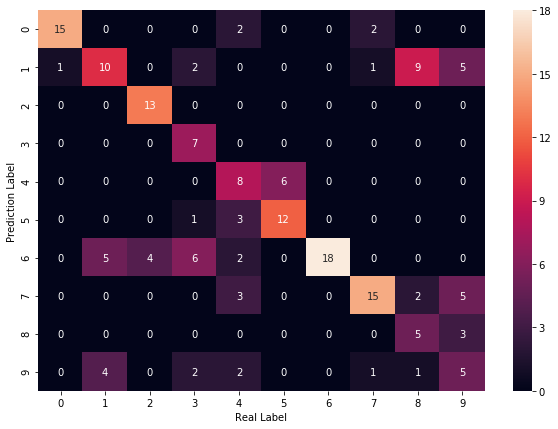

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[5] real:5
#1 min_error:0 index:[6] real:2
#2 min_error:0 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[6] real:1
#5 min_error:0 index:[9] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[9] real:1
#10 min_error:0 index:[0] real:7
#11 min_error:0 index:[9] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[9] real:1
#15 min_error:1 index:[3 8 9] real:3
#16 min_error:0 index:[7] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[1] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[9] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[6] real:6
#29 min_error:0 index:[8] real:9
#30 min_error:0 

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6326530612244898
Avg Base Learner:0.8877551020408163


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.5166666666666667


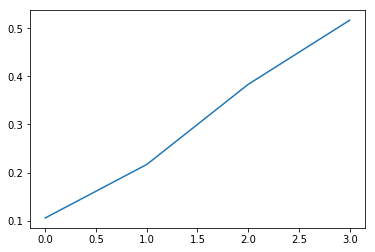

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.10555555555555556,
 0.21666666666666667,
 0.38333333333333336,
 0.5166666666666667]